<a href="https://colab.research.google.com/github/AleR26/demo/blob/master/asset_v1_UTAustinX%2BCSMS_ML_311%2B1T2023%2Btype_asset%2Bblock_hw2_programming_base_notebookv1xhl4ood7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [2]:
def generate_data(m):
    # returns the true w as well as X, Y data
    #create random normal vector
    w = np.random.normal(size=10)
    #norm of the vector
    w_norm = np.linalg.norm(w)
    #w*
    w_star = w / w_norm    
    xi_data = []
    yi_data = []
    for i in range(m):
      xi = np.random.normal(size=10)
      dotprd= np.dot(w_star, xi)
      probability = 1 / (1 + np.exp(-dotprd))
      if np.random.rand() < probability:
        yi = 1
      else:
        yi = 0
      # training_set.append((xi, yi))
      xi_data.append(xi)
      yi_data.append(yi)  
    return w_star, xi_data, yi_data, w
w_star, xi_data, yi_data, w = generate_data(50)

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [3]:
w_star, xi_data, yi_data, w = generate_data(10)
def logisticRegression(xi_data,yi_data):
    clf = LogisticRegression(max_iter=1000)
    clf.fit(xi_data, yi_data)
    w_prime = clf.coef_
    return w_prime
w_reg = logisticRegression(xi_data, yi_data)
result_reg =  np.linalg.norm(np.subtract(w_star, w_reg))
result_reg


1.3558163364125366

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [4]:
def gradient_descent(x, y, w, learning_rate, iterations):
    m = len(y)
    for i in range(iterations):
        # Compute the predictions
        y_pred = np.dot(x, w)

        # Compute the gradient of the loss function with respect to w
        gradient = w - (1/m) *learning_rate* (x.T.dot((y_pred - y)))

        # Update the parameters
        w = gradient
    return w
w_star, xi_data, yi_data, w = generate_data(10)
x = np.array(xi_data)
y = yi_data
eta = 0.01
iterations = 1000
w_grad = gradient_descent(x, y, w, eta, iterations)
result_grad =  np.linalg.norm(np.subtract(w_star, w_grad))
result_grad


1.0742305748540597



> Indented block



```
# This is formatted as code
```

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [5]:
from numpy.linalg import slogdet
def SGD(x, y, w, learning_rate, iterations):
  m = len(y)
  for i in range(iterations):
        # Compute the predictions
        rand_ind = np.random.randint(m)
        x_i = x[rand_ind,:]
        y_i = y[rand_ind]
        y_pred = np.dot(x_i, w)

        # Compute the gradient of the loss function with respect to w
        gradient = w - (1/m)*learning_rate * np.dot(x_i.T, (y_pred - y_i)) 
        # Update the parameters
        w = gradient
  return w
w_star, xi_data, yi_data, w = generate_data(10)
x = np.array(xi_data)
y = yi_data
eta = 0.01
iterations = 1000
w_sgd = SGD(x, y, w, eta, iterations)
result_sgd =  np.linalg.norm(np.subtract(w_star, w_sgd))
result_sgd



1.2773618311649217

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

Time taken to logistic regression:  0.008055686950683594  seconds
Time taken to gradient Descent:  0.012245655059814453  seconds
Time taken to Stochastic gradient descent:  0.017252445220947266  seconds


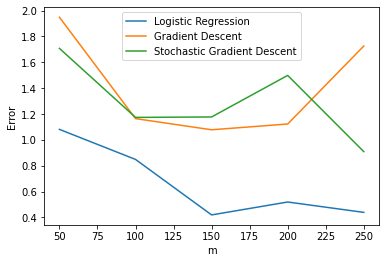

In [6]:
import matplotlib.pyplot as plt
import time

lst_m = [50,100,150,200,250]
lst_reg = []
lst_grad=[]
lst_sgd=[]

for i in lst_m:
    w_star, xi_data, yi_data,w = generate_data(i)
    #Logistic Regression ||w-w'||
    start_time = time.time()
    w_reg = logisticRegression(xi_data, yi_data)
    end_time = time.time()
    time_reg = end_time - start_time
    result_reg =  np.linalg.norm(w_star - w_reg)
    lst_reg.append(result_reg)
    #Gradient Descent ||w-w'|| 
    start_time = time.time()
    w_grad = gradient_descent(x, y, w, eta, iterations)
    end_time = time.time()
    time_grad = end_time - start_time
    result_grad =  np.linalg.norm(w_star - w_grad)
    lst_grad.append(result_grad)
    #Stochastic Gradient Descent ||w-w'||
    start_time = time.time() 
    w_sgd = SGD(x, y, w, eta, iterations)
    end_time = time.time()
    time_sgd = end_time - start_time
    result_sgd =  np.linalg.norm(w_star - w_sgd)
    lst_sgd.append(result_sgd)
print("Time taken to logistic regression: " , time_reg, " seconds")
print("Time taken to gradient Descent: " , time_grad, " seconds")
print("Time taken to Stochastic gradient descent: " , time_sgd, " seconds")

plt.plot(lst_m,lst_reg, label = "Logistic Regression")
plt.plot(lst_m,lst_grad, label = "Gradient Descent")
plt.plot(lst_m,lst_sgd, label = "Stochastic Gradient Descent")

plt.xlabel("m")
plt.ylabel("Error")
plt.legend()
plt.show()




# Problem 2

In [7]:
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [8]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

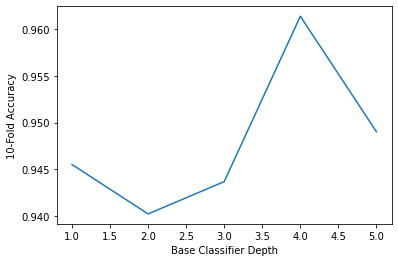

In [9]:
depth = [1,2,3,4,5]
accuracy = []
for i in depth:
  tree = DecisionTreeClassifier(max_depth=i, random_state = 101)
  clf = AdaBoostClassifier(base_estimator = tree, n_estimators=10,learning_rate = 1, random_state=101)
  score = cross_val_score(clf,cancer.data,cancer.target,cv=10)
  accuracy.append(np.mean(score))

plt.plot(depth, accuracy)
plt.xlabel("Base Classifier Depth")
plt.ylabel("10-Fold Accuracy")
plt.show()
